# **Setting**

In [ ]:
! pip install koreanize-matplotlib

In [1]:
# system
import os
import warnings
warnings.filterwarnings('ignore')                       # warning 출력 false

# dataframe
import pickle
import numpy as np
import pandas as pd

# plot
import matplotlib as mpl
import matplotlib.pyplot as plt
# import koreanize_matplotlib
import seaborn as sns
from PIL import Image

# sklearn
from sklearn.model_selection import train_test_split

# **1. 데이터 저장하기**

In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
# kaggle.json API token
# from google.colab import files
# files.upload()

# !ls -1ha kaggle.json

# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

kaggle.json


In [9]:
# ! kaggle datasets download -d frobert/handdrawn-shapes-hds-dataset

 64% 37.0M/57.7M [00:00<00:00, 84.7MB/s]
100% 57.7M/57.7M [00:00<00:00, 114MB/s] 


In [ ]:
# !mkdir handdrawn-shapes-hds-dataset
# !unzip handdrawn-shapes-hds-dataset -d ./handdrawn-shapes-hds-dataset

In [29]:
file_path = './handdrawn-shapes-hds-dataset/data/'
file_list = os.listdir(file_path)
shapes = ['ellipse', 'rectangle', 'triangle']

# Example
img_path = file_path + file_list[0] + '/images/' + shapes[0] + '/'
img_list = os.listdir(img_path)

print(img_list)

['ellipse.aly.0001.png', 'ellipse.aly.0002.png', 'ellipse.aly.0003.png', 'ellipse.aly.0004.png', 'ellipse.aly.0005.png', 'ellipse.aly.0006.png', 'ellipse.aly.0007.png', 'ellipse.aly.0008.png', 'ellipse.aly.0009.png', 'ellipse.aly.0010.png', 'ellipse.aly.0011.png', 'ellipse.aly.0012.png', 'ellipse.aly.0013.png', 'ellipse.aly.0014.png', 'ellipse.aly.0015.png', 'ellipse.aly.0016.png', 'ellipse.aly.0017.png', 'ellipse.aly.0018.png', 'ellipse.aly.0019.png', 'ellipse.aly.0020.png', 'ellipse.aly.0021.png', 'ellipse.aly.0022.png', 'ellipse.aly.0023.png', 'ellipse.aly.0024.png', 'ellipse.aly.0025.png', 'ellipse.aly.0026.png', 'ellipse.aly.0027.png', 'ellipse.aly.0028.png', 'ellipse.aly.0029.png', 'ellipse.aly.0030.png', 'ellipse.aly.0031.png', 'ellipse.aly.0032.png', 'ellipse.aly.0033.png', 'ellipse.aly.0034.png', 'ellipse.aly.0035.png', 'ellipse.aly.0036.png', 'ellipse.aly.0037.png', 'ellipse.aly.0038.png', 'ellipse.aly.0039.png', 'ellipse.aly.0040.png', 'ellipse.aly.0041.png', 'ellipse.aly.00

In [63]:
X_data = []
y_data = []

print('image를 불러오는 중입니다.')
for file_name in file_list:
    print(f'> {file_name}', end=' ')
    shape_path = file_path + file_name + '/images/'
    shapes = os.listdir(shape_path)
    for shape in shapes:
        print(f'> {shape}', end=' ')
        img_path = shape_path + shape + '/'
        img_list = os.listdir(img_path)

        cnt = 0
        for img in img_list:
            img_mat = np.array(Image.open(img_path + img))
            X_data.append(np.array(img_mat)[:,:,:-1])       # RGBA를 RGB로 변환
            y_data.append(shape)
            cnt += 1
        print(f'> {cnt}', end=' ')
    print('완료')
print('image를 모두 불러왔습니다.')

image를 불러오는 중입니다.
> user.aly > ellipse > 89 > rectangle > 60 > triangle > 71 완료
> user.crt > ellipse > 131 > rectangle > 83 > triangle > 149 완료
> user.drt > ellipse > 47 > rectangle > 44 > triangle > 39 완료
> user.elu > ellipse > 90 > rectangle > 54 > triangle > 48 완료
> user.frt > ellipse > 156 > rectangle > 227 > triangle > 159 완료
> user.if1 > ellipse > 207 > rectangle > 198 > triangle > 104 완료
> user.if2 > ellipse > 263 > other > 796 > rectangle > 487 > triangle > 474 완료
> user.if3 > ellipse > 262 > other > 75 > rectangle > 283 > triangle > 350 완료
> user.if5 > ellipse > 375 > other > 122 > rectangle > 377 > triangle > 549 완료
> user.if8 > ellipse > 1559 > other > 970 > rectangle > 2240 > triangle > 1627 완료
> user.il1 > ellipse > 200 > other > 1130 > rectangle > 237 > triangle > 214 완료
> user.ilb > ellipse > 54 > rectangle > 65 > triangle > 42 완료
> user.im1 > ellipse > 18 > rectangle > 21 > triangle > 27 완료
> user.lrt > ellipse > 48 > rectangle > 67 > triangle > 60 완료
> user.lt1 > recta

In [101]:
X_data = np.array(X_data)
y_data = np.array(y_data)

print(f'X_data = {X_data.shape}\ty_data = {y_data.shape}')

X_data = (27292, 70, 70, 3)	y_data = (27292,)


In [65]:
# 데이터 저장
with open('./hds_data.pkl', 'wb') as f:
    pickle.dump({'image':X_data, 'shape':y_data}, f)

# **2. 데이터 불러오기**

In [21]:
# 데이터 불러오기
with open('./hds_data.pkl', 'rb') as f:
    data = pickle.load(f)

In [22]:
# 전체 데이터
X_data = data['image']
y_data = data['shape']

print(f'X_data = {X_data.shape}\ty_data = {y_data.shape}')

print(f'총 {len(X_data)}개의 이미지 데이터를 불러왔습니다')

X_data = (27292, 70, 70, 3)	y_data = (27292,)
총 27292개의 이미지 데이터를 불러왔습니다


In [18]:
def show_image_samples(X_data, y_data, n=10, seed=1, nrow=2, ncol=5, figsize=(10, 4)):
    np.random.seed(seed)
    choices = np.random.choice(X_data.shape[0], n, replace=False)

    fig = plt.figure(figsize=figsize)
    plt.subplots_adjust(wspace=0.5)

    for i, c in enumerate(choices):
        ax = plt.subplot(nrow, ncol, i+1)
        img, shape = X_data[c], y_data[c]
        ax.imshow(Image.fromarray(255-img))
        ax.set_title(shape)
        ax.axis('off')


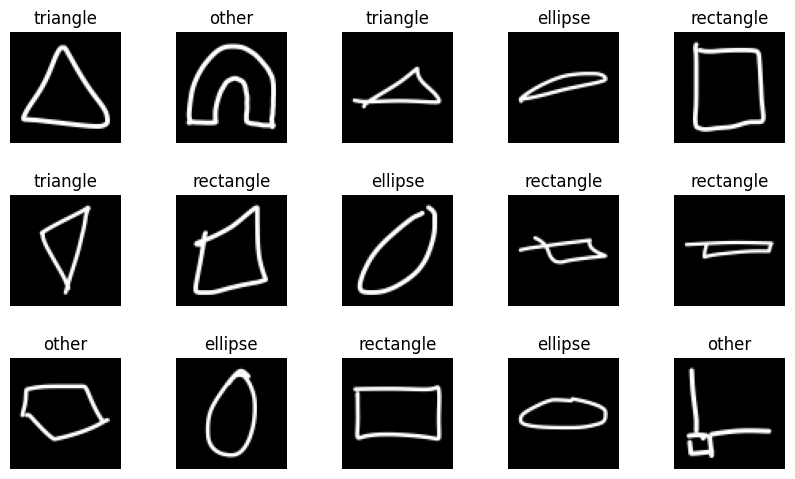

In [23]:
# 샘플 보기
show_image_samples(X_data, y_data, n=15, nrow=3, ncol=5, figsize=(10, 6))

# **3. 데이터 전처리**

In [26]:
def gray_scaling(img):
    R = img[:,:,:,0] * 0.2126
    G = img[:,:,:,1] * 0.7152
    B = img[:,:,:,2] * 0.0722

    gray = R + G + B

    return gray

In [30]:
# 데이터 전처리 - grayscale
X_data = gray_scaling(X_data)
X_data.shape

(27292, 70, 70)

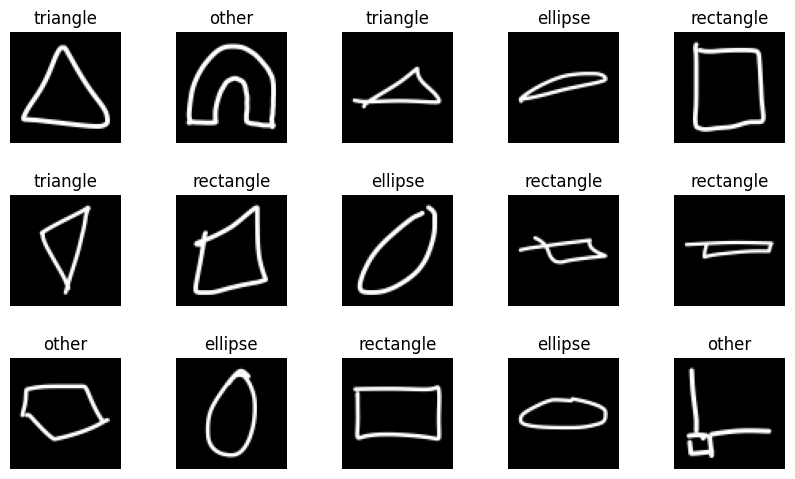

In [32]:
# 샘플 보기
show_image_samples(X_data, y_data, n=15, nrow=3, ncol=5, figsize=(10, 6))

In [33]:
# 데이터 전처리 - 정규화
X_data = X_data / 255.0

In [34]:
# 데이터 전처리 - 라벨 인코딩
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# fit, transform 메소드를 통한 레이블 인코딩
y_enc = encoder.fit_transform(y_data)

encoder.classes_

array(['ellipse', 'other', 'rectangle', 'triangle'], dtype='<U9')

In [53]:
from collections import Counter

counter = Counter(y_data)
print(counter)

Counter({'other': 7287, 'rectangle': 6956, 'triangle': 6595, 'ellipse': 6454})


In [35]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_data, y_enc, test_size=0.2, random_state=100)
print(f'X_train={X_train.shape}\tX_test={X_test.shape}\ty_train={y_train.shape}\ty_test={y_test.shape}')

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=100)
print(f'X_train={X_train.shape}\tX_valt={X_val.shape}\ty_train={y_train.shape}\ty_val={y_val.shape}')

X_train=(21833, 70, 70)	X_test=(5459, 70, 70)	y_train=(21833,)	y_test=(5459,)
X_train=(19649, 70, 70)	X_valt=(2184, 70, 70)	y_train=(19649,)	y_val=(2184,)


In [36]:
# 데이터 저장
with open('./hds_data_dict.pkl', 'wb') as f:
    pickle.dump({'X_train':X_train, 'X_val':X_val, 'X_test':X_test,
                 'y_train':y_train, 'y_val':y_val, 'y_test':y_test}, f)

# **4. MLP 구현하기**

In [37]:
# 데이터 불러오기
with open('./hds_data_dict.pkl', 'rb') as f:
    data = pickle.load(f)

X_train = data['X_train']
X_val = data['X_val']
X_test = data['X_test']
y_train = data['y_train']
y_val = data['y_val']
y_test = data['y_test']

print(f'X_train={X_train.shape}\tX_valt={X_val.shape}\tX_test={X_test.shape}')
print(f'y_train={y_train.shape}\ty_valt={y_val.shape}\ty_test={y_test.shape}')

X_train=(19649, 70, 70)	X_valt=(2184, 70, 70)	X_test=(5459, 70, 70)
y_train=(19649,)	y_valt=(2184,)	y_test=(5459,)


In [38]:
import tensorflow as tf

print(f'TensorFlose version = {tf.__version__}')

TensorFlose version = 2.12.0


In [39]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

In [66]:
# 모델 설정하기
input_shape = X_train.shape[1:]
n_classes = len(encoder.classes_)

model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 4900)              0         
                                                                 
 dense_32 (Dense)            (None, 128)               627328    
                                                                 
 dense_33 (Dense)            (None, 64)                8256      
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dense_35 (Dense)            (None, 4)                 132       
                                                                 
Total params: 637,796
Trainable params: 637,796
Non-trainable params: 0
_________________________________________________________________


In [67]:
from keras.losses import sparse_categorical_crossentropy

# 모델 환경 설정하기(loss, optimizer, metrics 설정)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [68]:
from keras.callbacks import EarlyStopping

num_epochs = 100
batch_size = 50

# 학습 중단 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model_fit = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size,
                      validation_data=(X_val, y_val),callbacks=[early_stopping])

Epoch 1/100
393/393 [==============================] - 5s 11ms/step - loss: 1.2195 - accuracy: 0.4403 - val_loss: 1.0693 - val_accuracy: 0.5114
Epoch 2/100
393/393 [==============================] - 4s 11ms/step - loss: 1.0134 - accuracy: 0.5747 - val_loss: 0.9961 - val_accuracy: 0.5888
Epoch 3/100
393/393 [==============================] - 4s 10ms/step - loss: 0.9122 - accuracy: 0.6341 - val_loss: 0.8932 - val_accuracy: 0.6200
Epoch 4/100
393/393 [==============================] - 4s 10ms/step - loss: 0.8547 - accuracy: 0.6562 - val_loss: 0.8089 - val_accuracy: 0.7129
Epoch 5/100
393/393 [==============================] - 4s 11ms/step - loss: 0.7973 - accuracy: 0.6836 - val_loss: 0.8584 - val_accuracy: 0.6474
Epoch 6/100
393/393 [==============================] - 4s 10ms/step - loss: 0.7292 - accuracy: 0.7120 - val_loss: 0.6671 - val_accuracy: 0.7376
Epoch 7/100
393/393 [==============================] - 4s 9ms/step - loss: 0.6874 - accuracy: 0.7294 - val_loss: 0.6944 - val_accuracy: 

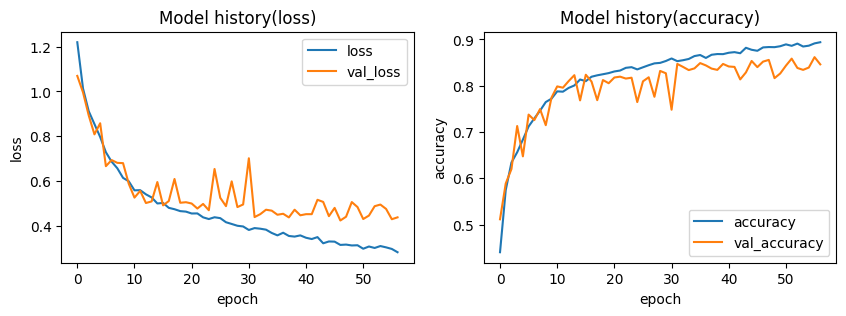

In [121]:
# 과적합 여부 판단
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

history = model_fit.history
names = ['loss', 'accuracy']

for i, name in enumerate(names):
    ax[i].plot(history[name], label=name)
    ax[i].plot(history['val_'+name], label='val_'+name)
    ax[i].set(xlabel='epoch', ylabel=name, title=f'Model history({name})')
    ax[i].legend()


In [69]:
# 성능 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

171/171 [==============================] - 1s 6ms/step - loss: 0.4937 - accuracy: 0.8315
Test accuracy: 0.8314709663391113


In [73]:
# 모델 저장
model.save('./hds_model.hdf5')
print('저장 완료!')

저장 완료!


# **5. 성능 평가하기**

In [109]:
def test_image_samples(X_test, y_test, y_pred, n=10, seed=1, nrow=2, ncol=5, figsize=(10, 4)):
    labels = ['ellipse', 'other', 'rectangle', 'triangle']

    np.random.seed(seed)
    choices = np.random.choice(X_test.shape[0], n, replace=False)

    fig = plt.figure(figsize=figsize)
    plt.subplots_adjust(wspace=0.5)

    for i, c in enumerate(choices):
        ax = plt.subplot(nrow, ncol, i+1)
        img, shape, pred = X_test[c], y_test[c], y_pred[c]

        color = 'red' if shape != pred else 'black'
        title = f'{labels[shape]}({labels[pred]})' if shape != pred else labels[shape]

        ax.imshow(Image.fromarray(img*255))
        ax.set_title(title, color=color)
        ax.axis('off')

    return choices

In [102]:
# 예측하기
y_pred = model.predict(X_test).argmax(axis=1)

171/171 [==============================] - 1s 4ms/step


[ 642 5241 3867 4267 3976 3755  956 4746 4510 4197 3712 1399 2456 3327
 2131]


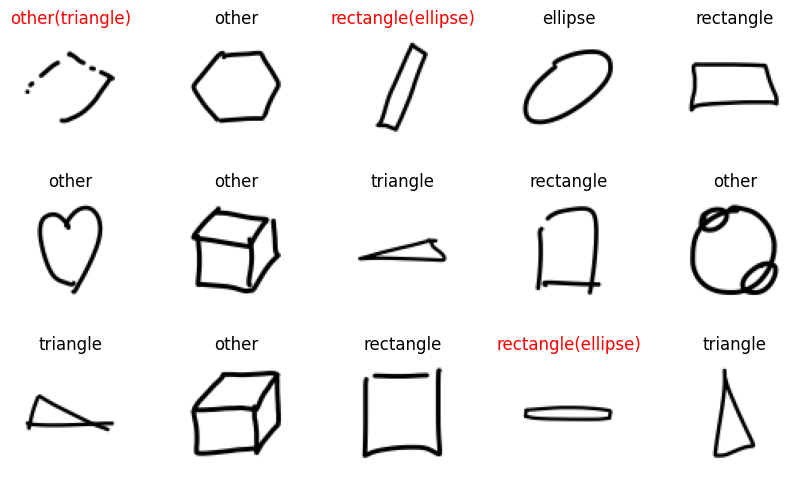

In [111]:
# 샘플
choices = test_image_samples(X_test, y_test, y_pred, seed=100, n=15, nrow=3, ncol=5, figsize=(10, 6))
print(choices)

In [104]:
y_test[5360], y_pred[5360]

(3, 1)

In [108]:
X_test[5360]*255

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])